In [1]:
#####################################################################
#In this notebook we estimate different centrality measures for the
#network to be analysed.

#We identify the top 5 countries by centrality measure
#We produce world maps based on the countries centralities.

#This analysis can be repeated for each commodity and year.
#####################################################################

In [2]:
import pandas as pd
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
def graph_generation(directory,year, commodity):
    '''This function upload the csv with the data in "directory" 
    and return a networkx graph for a specific year and commodity.'''
    
    fields = ['yr','rt3ISO','pt3ISO','cmdCode','TradeValue']
    df = pd.read_csv(directory, skipinitialspace = True, usecols = fields)
    #Filter by commodity and year
    df = df[df['yr']      == year]
    df = df[df['cmdCode'] == commodity]
    
    G = nx.from_pandas_edgelist(df,
                             source       = 'rt3ISO',
                             target       = 'pt3ISO',
                             edge_attr    =  'TradeValue',
                             create_using = nx.DiGraph())
    print(nx.info(G))
    return(G)

In [4]:
def centrality_hist(lst):
    '''This function produces a histogram for the centrality measure'''
    plt. figure(figsize=(5,5))
    plt.hist(lst, rwidth=0.8)
    plt.title("Centrality distribution")
    plt.xlabel("Centrality")
    plt.ylabel("Count")
    plt.show()

### Degree centrality

Degree is the simplest and the most common way of finding important nodes. A node’s degree is the sum of its edges.

The nodes with the highest degree in a social network are the people who know the most people. These nodes are often referred to as hubs, and calculating degree is the quickest way of identifying hubs.

In [5]:
def in_degree_centrality(G, info=False, node_attribute= False):
    '''Input a networkx graph
       return an ordered dictionary with node name and *in_degree*
       if info = True also return the 10 biggest nodes by degree
       if node_attribute = True also add the node degree as attribute'''
    
    in_degree_dict = dict(G.in_degree(G.nodes(), weight= 'TradeValue'))
    sorted_in_degree = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True)
    
    if node_attribute:
        nx.set_node_attributes(G, in_degree_dict, 'in_degree')
    if info:
        print("Top 10 nodes by degree:")
        for d in sorted_in_degree[:10]:
            print(d)
    
    return(sorted_in_degree)

In [6]:
def out_degree_centrality(G, info=False, node_attribute= False):
    '''Input a networkx graph
       return an ordered dictionary with node name and *out_degree*
       if info = True also return the 10 biggest nodes by degree
       if node_attribute = True also add the node degree as attribute'''
    
    out_degree_dict = dict(G.out_degree(G.nodes(), weight= 'TradeValue'))
    sorted_out_degree = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True)
    
    if node_attribute:
        nx.set_node_attributes(G, out_degree_dict, 'out_degree')

    if info:
        print("Top 10 nodes by degree:")
        for d in sorted_out_degree[:10]:
            print(d)
    
    return(sorted_out_degree)

### Closeness Centrality

The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. Nodes with a high closeness score have the shortest distances to all other nodes. So, a node with high closeness centrality is literally close to other nodes

In [7]:
def closeness_centrality(G, info=False,node_attribute=False):
    close_centrality = nx.closeness_centrality(G) #does not need weights
    sorted_centrality = sorted(close_centrality.items(), key=itemgetter(1), reverse=True)
    
    if node_attribute:
        nx.set_node_attributes(G, close_centrality, 'closeness')
    if info:
        print("Top 20 nodes by closeness centrality:")
        for d in sorted_centrality[:10]:
            print(d)
        
    return(sorted_centrality)

### Hubs eigenvector centrality

Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. If you know a lot of well-connected people, you could spread a message very efficiently. 

In [8]:
def eigenvector_centrality(G, info=False, node_attribute= False):
    '''Input a networkx graph
       return an ordered dictionary with node name and *eigenvector*
       if info = True also return the 10 biggest nodes by degree
       if node_attribute = True also add the node degree as attribute'''
    eigenvector_dict = nx.eigenvector_centrality(G, weight = 'TradeValue') # Run eigenvector centrality
    sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
    
    if node_attribute:
        nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
    
    if info:
        print("")
        print("Top 10 nodes by eigenvector centrality:")
        for b in sorted_eigenvector[:10]:
            print(b)
        
        
    return(sorted_eigenvector)

### Betweenness centrality

Betweenness centrality looks at all the shortest paths that pass through a particular node (see above). To do this, it must first calculate every possible shortest path in your network, so keep in mind that betweenness centrality will take longer to calculate than other centrality measures (but it won’t be an issue in a dataset of this size). Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network. If you’re the only thing connecting two clusters, every communication between those clusters has to pass through you. In contrast to a hub, this sort of node is often referred to as a broker. Betweenness centrality is not the only way of finding brokerage (and other methods are more systematic), but it’s a quick way of giving you a sense of which nodes are important not because they have lots of connections themselves but because they stand between groups, giving the network connectivity and cohesion

In [9]:
def betweenness_centrality(G, info=False, node_attribute= False):
    '''Input a networkx graph
       return an ordered dictionary with node name and *betweenness*
       if info = True also return the 10 biggest nodes by degree
       if node_attribute = True also add the node degree as attribute'''
    
    betweenness_dict = nx.betweenness_centrality(G, weight = 'TradeValue') # Run betweenness centrality
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
    
    if node_attribute:
        nx.set_node_attributes(G, betweenness_dict, 'betweenness')
    
    
    if info:
        print("Top 10 nodes by betweenness centrality:")
        for b in sorted_betweenness[:10]:
            print(b)

        
    return(sorted_betweenness)

### Page Rank

PageRank is an adjustment of Katz centrality that takes into consideration this issue. There are three distinct factors that determine the PageRank of a node: (i) the number of links it receives, (ii) the link propensity of the linkers, and (iii) the centrality of the linkers


In [10]:
def pageRank_centrality(G,info=False,node_attribute=False):
    '''Input a networkx graph
       return an ordered dictionary with node name and *PageRank*
       if info = True also return the 10 biggest nodes by degree
       if node_attribute = True also add the node degree as attribute'''
    
    page_rank = nx.pagerank(G, alpha = 0.8, weight = 'TradeValue') 
    sorted_page_rank = sorted(page_rank.items(), key=itemgetter(1), reverse=True)
    
    if node_attribute:
        nx.set_node_attributes(G, page_rank, 'PageRank')
        
    if info:
        print("Top 10 nodes by Page rank:")
        for b in sorted_page_rank[:10]:
            print(b)
        
    return(sorted_page_rank)

# Centrality measures visualization

#### Save the centrality measurements 

In [11]:
def centrality_comparison(G,to_csv=False):
    '''This function estimate all the different centralities for a 
    specific graph G, it returns '''
    sorted_in_degree    = in_degree_centrality(G)
    sorted_out_degree   = out_degree_centrality(G)
    sorted_centrality   = closeness_centrality(G)
    sorted_betweenness  = betweenness_centrality(G)
    sorted_eigenvector  = eigenvector_centrality(G) 
    sorted_page_rank    = pageRank_centrality(G)
    
    in_degree = pd.DataFrame.from_dict(sorted_in_degree)
    in_degree.columns =['Node', 'In Degree centrality'] 
    in_degree['In Degree centrality'] = (in_degree['In Degree centrality'] - min(in_degree['In Degree centrality']))/(max(in_degree['In Degree centrality'])- min(in_degree['In Degree centrality']))

    out_degree = pd.DataFrame.from_dict(sorted_out_degree)
    out_degree.columns =['Node', 'Out Degree centrality'] 
    out_degree['Out Degree centrality'] = (out_degree['Out Degree centrality'] - min(out_degree['Out Degree centrality']))/(max(out_degree['Out Degree centrality'])- min(out_degree['Out Degree centrality']))

    closeness = pd.DataFrame.from_dict(sorted_centrality)#closeness centrality
    closeness.columns =['Node', 'Closeness centrality'] 
    closeness['Closeness centrality'] = (closeness['Closeness centrality'] - min(closeness['Closeness centrality']))/(max(closeness['Closeness centrality'])- min(closeness['Closeness centrality']))
    
    eigenvec = pd.DataFrame.from_dict(sorted_eigenvector)
    eigenvec.columns =['Node', 'Eigenvector centrality'] 
    eigenvec['Eigenvector centrality'] = (eigenvec['Eigenvector centrality'] - min(eigenvec['Eigenvector centrality']))/(max(eigenvec['Eigenvector centrality'])- min(eigenvec['Eigenvector centrality']))


    betweenness = pd.DataFrame.from_dict(sorted_betweenness)
    betweenness.columns =['Node', 'Betweenness centrality'] 
    betweenness['Betweenness centrality'] = (betweenness['Betweenness centrality'] - min(betweenness['Betweenness centrality']))/(max(betweenness['Betweenness centrality'])- min(betweenness['Betweenness centrality']))


    page_rank = pd.DataFrame.from_dict(sorted_page_rank)
    page_rank.columns =['Node', 'Page Rank centrality'] 
    page_rank['Page Rank centrality'] = (page_rank['Page Rank centrality'] - min(page_rank['Page Rank centrality']))/(max(page_rank['Page Rank centrality'])- min(page_rank['Page Rank centrality']))

    
    if to_csv:
        in_degree.to_csv("./Data/Centrality/in_degree.csv")
        out_degree.to_csv("./Data/Centrality/out_degree.csv", index = False)
        closeness.to_csv("./Data/Centrality/closeness.csv", index = False)
        eigenvec.to_csv("./Data/Centrality/eigenvec.csv", index = False)
        betweenness.to_csv("./Data/Centrality/betweenness.csv", index = False)
        page_rank.to_csv("./Data/Centrality/page_rank.csv", index = False)
        
        
    return(in_degree,out_degree,closeness,eigenvec,betweenness,page_rank)

In [12]:
#Estimate all centralities
year      = 2015
commodity = 1
directory = r"C:\Users\hilar\My Drive\PoD\3rdSemester\Network_science\Network_Science_Project/NS_FP_DATA/final_dataset.csv" 
G = graph_generation(directory,year, commodity)

in_degree,out_degree,closeness,eigenvec,betweenness,page_rank = centrality_comparison(G,to_csv=False)   

C:\Users\hilar\AppData\Local\Temp\ipykernel_17528\3075048995.py:16: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


DiGraph with 194 nodes and 3922 edges


## Plot the top 5 countries by centrality for each algorithm

In [13]:
def centrality_algorithms_comparison(in_degree,out_degree,closeness,eigenvec,betweenness,page_rank):
    in_degree   = in_degree[0:5]
    out_degree  = out_degree[0:5]
    closeness   = closeness[0:5]
    eigenvec    = eigenvec[0:5]
    betweenness = betweenness[0:5]
    page_rank   = page_rank[0:5]
    
    # Initialize the matplotlib figure

    fig, (ax, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6,figsize=(10, 10) )

    # -----------------------------------------------------------------------------------------------
    sns.barplot(x="In Degree centrality", y="Node",data=in_degree,
                color="tab:blue", orient = 'h',order=in_degree.sort_values('In Degree centrality', ascending=False)['Node'] , ax = ax)
    # Add a legend and informative axis label
    ax.tick_params(axis='y', which='major', labelsize=16)
    ax.set_xlabel('In Degree centrality',fontsize=16)
    ax.set_ylabel('')

    # -----------------------------------------------------------------------------------------------
    sns.barplot(x="Out Degree centrality", y="Node",data=out_degree,
                color="tab:orange", orient = 'h',order=out_degree.sort_values('Out Degree centrality', ascending=False)['Node'] , ax = ax2)
    # Add a legend and informative axis label
    ax2.tick_params(axis='y', which='major', labelsize=16)
    ax2.set_xlabel('Out Degree centrality',fontsize=16)
    ax2.set_ylabel('')

    # -----------------------------------------------------------------------------------------------
    sns.barplot(x='Closeness centrality', y="Node",data=closeness,
                color="tab:green", orient = 'h',order=closeness.sort_values('Closeness centrality', ascending=False)['Node'] , ax = ax3)
    # Add a legend and informative axis label
    ax3.tick_params(axis='y', which='major', labelsize=16)
    ax3.set_xlabel('Closeness centrality',fontsize=16)
    ax3.set_ylabel('')

    # -----------------------------------------------------------------------------------------------
    sns.barplot(x='Eigenvector centrality', y="Node",data=eigenvec,
                color="tab:red", orient = 'h',order=eigenvec.sort_values('Eigenvector centrality', ascending=False)['Node'] , ax = ax4)
    # Add a legend and informative axis label
    ax4.tick_params(axis='y', which='major', labelsize=16)
    ax4.set_xlabel('Eigenvector centrality',fontsize=16)
    ax4.set_ylabel('')

    # -----------------------------------------------------------------------------------------------
    sns.barplot(x= 'Betweenness centrality', y="Node",data=betweenness,
                color="tab:purple", orient = 'h',order=betweenness.sort_values('Betweenness centrality', ascending=False)['Node'] , ax = ax5)
    # Add a legend and informative axis label
    ax5.tick_params(axis='y', which='major', labelsize=16)
    ax5.set_xlabel('Betweenness centrality',fontsize=16)
    ax5.set_ylabel('')

    # -----------------------------------------------------------------------------------------------
    sns.barplot(x='Page Rank centrality', y="Node",data=page_rank,
                color="tab:cyan", orient = 'h',order=page_rank.sort_values('Page Rank centrality', ascending=False)['Node'] , ax = ax6)

    # Add a legend and informative axis label
    ax6.tick_params(axis='y', which='major', labelsize=16)
    ax6.set_xlabel('Page Rank centrality',fontsize=16)
    ax6.set_ylabel('')
    plt.tight_layout()
    sns.despine(left=True, bottom=True)

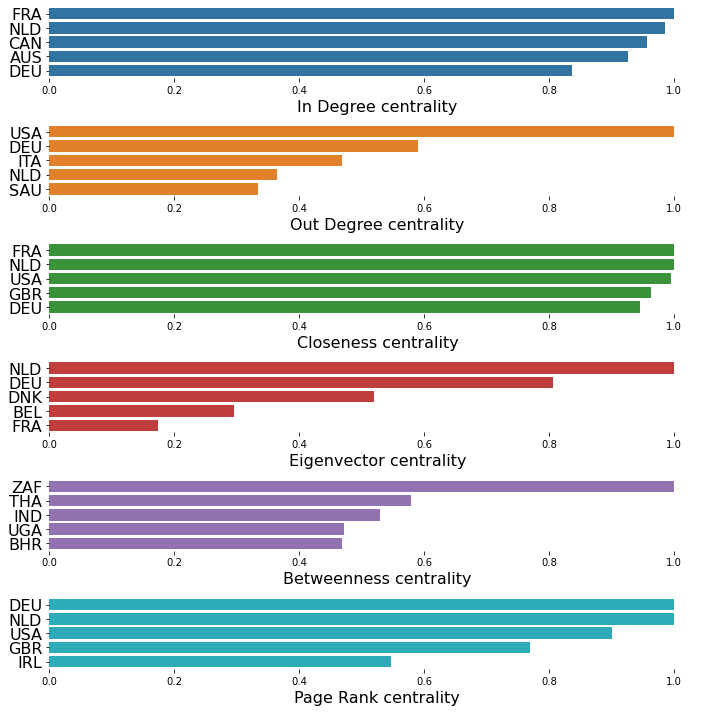

In [14]:
centrality_algorithms_comparison(in_degree,out_degree,closeness,eigenvec,betweenness,page_rank)

## Plot centrality map

Retrieve the country coordinates

In [15]:
def country_coordinates(path):
    '''Here we get the country coordinates to be used for plotting purpose'''
    c_fields     = ["cc3","latitude","longitude"]
    df_coor = pd.read_csv(path, skipinitialspace = True, usecols = c_fields)
    df_coor = df_coor.rename(columns={"cc3": "Node"})
    return(df_coor)

In [16]:
def centrality_df(betweenness,dfs):
    centrality = ['Closeness centrality','In Degree centrality',
              'Out Degree centrality','Eigenvector centrality','Page Rank centrality']

    betweenness = betweenness.sort_values(['Node'])
    df_centralities    = betweenness.reset_index()
    i = 0
    for df in dfs:
        df_centralities = pd.merge(df_centralities, df, on='Node', how='outer')
        i+=1

    #Add country coordinates
    df_centralities = pd.merge(df_centralities, df_coordinates, on='Node', how='outer')
    df_centralities = df_centralities[df_centralities['index'].notna()]
    
    return(df_centralities)

In [17]:
# #Putting all together
df_coordinates = country_coordinates(r"C:\Users\hilar\My Drive\PoD\3rdSemester\Network_science\Network_Science_Project/NS_FP_DATA/countries.csv")
dfs = [closeness,in_degree,out_degree,eigenvec,page_rank]
df_centralities = centrality_df(betweenness,dfs)

In [18]:
#test = get_all_comm2(2015,1)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world.rename(columns={"iso_a3": "Node"}, inplace=True)
world = pd.merge(world, df_centralities, on='Node', how='outer')

#centrality_maps2(world)

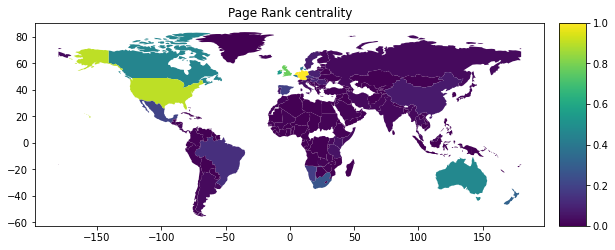

In [19]:
centrality = "Page Rank centrality"

fig, ax = plt.subplots(1, 1,figsize=(10, 7))
plt.title(centrality)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column=centrality, ax=ax, legend=True, cax=cax )
plt.show()